實作說明：
嘗試至少以下述方式之一(或用其他方式)提高正確率，以Matplotlib loss/accuracy 圖示之 

Dropout Rate(目前 0.2)

Batch Normalization (API?)

Kernel Size (目前 3 x 3)

Activation Function (目前 Relu)

Optimization: (目前 adam)

In [28]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.6.0


In [29]:
# 更多輸入

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [30]:
# 載入影像
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [31]:
# (28x28)乃 2D!
# convolution 需要 height x width x color 我們得 expand_dims
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [32]:
# 共有多少種物品
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [33]:
# 使用 函數式接口 functional API 建模
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model2 = Model(i, x)
model3 = Model(i, x)


In [34]:
# 使用 函數式接口 functional API 建模
i2 = Input(shape=x_train[0].shape)
x2 = Conv2D(32, (3, 3), strides=2, activation='sigmoid')(i2)
x2 = Conv2D(64, (3, 3), strides=2, activation='sigmoid')(x2)
x2 = Conv2D(128, (3, 3), strides=2, activation='sigmoid')(x2)
x2 = Flatten()(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(512, activation='sigmoid')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(K, activation='softmax')(x2)

model4 = Model(i2, x2)
model5 = Model(i2, x2)
model6 = Model(i2, x2)


In [ ]:
# your improved model code here to replace the above one

In [35]:
# 編譯與訓練
# 請確認用GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5247 - accuracy: 0.8069 - val_loss: 0.3949 - val_accuracy: 0.8527
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3637 - accuracy: 0.8636 - val_loss: 0.3642 - val_accuracy: 0.8658
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3159 - accuracy: 0.8809 - val_loss: 0.3352 - val_accuracy: 0.8767
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2836 - accuracy: 0.8924 - val_loss: 0.3034 - val_accuracy: 0.8877
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2567 - accuracy: 0.9029 - val_loss: 0.2964 - val_accuracy: 0.8933
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2350 - accuracy: 0.9112 - val_loss: 0.2979 - val_accuracy: 0.8929
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2188 - accuracy: 0.9184 - val_loss: 0.3021 -

In [36]:
# 編譯與訓練
# 請確認用GPU
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)
r6 = model6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.9266 - accuracy: 0.6516 - val_loss: 0.6119 - val_accuracy: 0.7629
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5581 - accuracy: 0.7883 - val_loss: 0.5138 - val_accuracy: 0.8041
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4864 - accuracy: 0.8148 - val_loss: 0.4765 - val_accuracy: 0.8185
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4479 - accuracy: 0.8311 - val_loss: 0.4456 - val_accuracy: 0.8290
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4186 - accuracy: 0.8404 - val_loss: 0.4385 - val_accuracy: 0.8343
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3971 - accuracy: 0.8500 - val_loss: 0.4039 - val_accuracy: 0.8466
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3804 - accuracy: 0.8554 - val_loss: 0.3962 -

In [ ]:
#your improved optimization code here to replace the above one

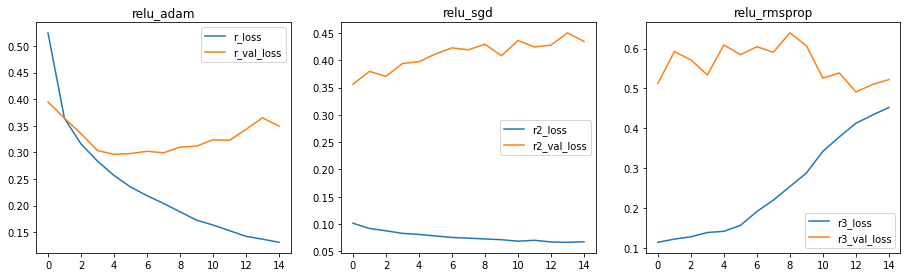

In [57]:
# 繪出迭代損失
import matplotlib.pyplot as plt
# plt.plot(r.history['loss'], label='loss')
# plt.plot(r.history['val_loss'], label='val_loss')
# plt.legend()
# =================================
plt.subplot(1,3,1) 
plt.plot(r.history['loss'], label='r_loss')
plt.plot(r.history['val_loss'], label='r_val_loss')
plt.title('relu_adam')

plt.legend()
plt.subplot(1,3,2) 
plt.plot(r2.history['loss'], label='r2_loss')
plt.plot(r2.history['val_loss'], label='r2_val_loss')
plt.title('relu_sgd')
plt.legend()
plt.subplot(1,3,3) 
plt.plot(r3.history['loss'], label='r3_loss')
plt.plot(r3.history['val_loss'], label='r3_val_loss')
plt.title('relu_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

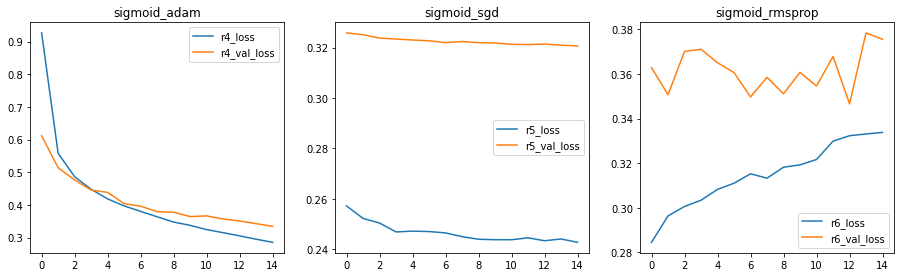

In [58]:
# 繪出迭代損失
import matplotlib.pyplot as plt
# plt.plot(r.history['loss'], label='loss')
# plt.plot(r.history['val_loss'], label='val_loss')
# plt.legend()
# =================================
plt.subplot(1,3,1) 
plt.plot(r4.history['loss'], label='r4_loss')
plt.plot(r4.history['val_loss'], label='r4_val_loss')
plt.title('sigmoid_adam')

plt.legend()
plt.subplot(1,3,2) 
plt.plot(r5.history['loss'], label='r5_loss')
plt.plot(r5.history['val_loss'], label='r5_val_loss')
plt.title('sigmoid_sgd')
plt.legend()
plt.subplot(1,3,3) 
plt.plot(r6.history['loss'], label='r6_loss')
plt.plot(r6.history['val_loss'], label='r6_val_loss')
plt.title('sigmoid_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

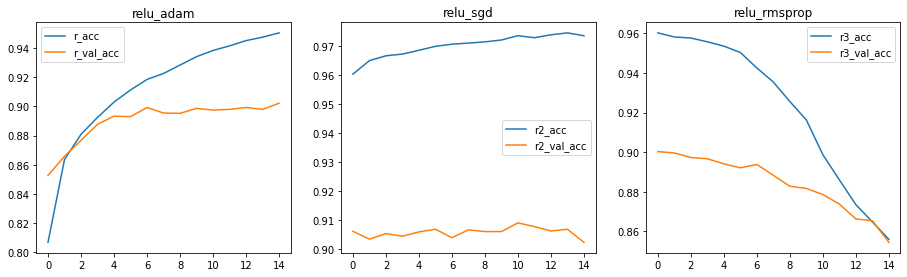

In [59]:
# 繪出迭代精準度
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()
# ===================================================
# 繪出每迭代的精準度
plt.subplot(1,3,1)
plt.plot(r.history['accuracy'], label='r_acc')
plt.plot(r.history['val_accuracy'], label='r_val_acc')
plt.title('relu_adam')
plt.legend()
plt.subplot(1,3,2)
plt.plot(r2.history['accuracy'], label='r2_acc')
plt.plot(r2.history['val_accuracy'], label='r2_val_acc')
plt.title('relu_sgd')
plt.legend()
plt.subplot(1,3,3)
plt.plot(r3.history['accuracy'], label='r3_acc')
plt.plot(r3.history['val_accuracy'], label='r3_val_acc')
plt.title('relu_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

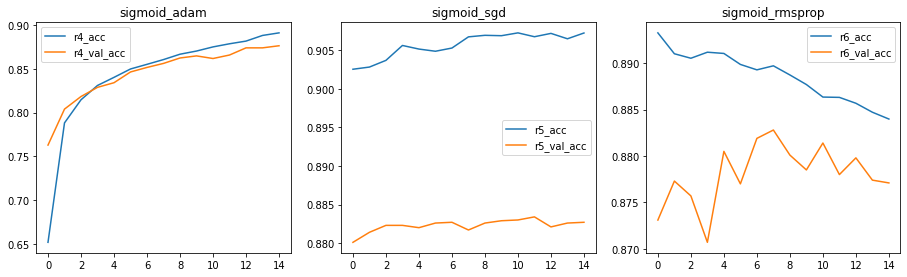

In [61]:
# 繪出迭代精準度
# plt.plot(r.history['accuracy'], label='acc')
# plt.plot(r.history['val_accuracy'], label='val_acc')
# plt.legend()
# ===================================================
# 繪出每迭代的精準度
plt.subplot(1,3,1)
plt.plot(r4.history['accuracy'], label='r4_acc')
plt.plot(r4.history['val_accuracy'], label='r4_val_acc')
plt.title('sigmoid_adam')
plt.legend()
plt.subplot(1,3,2)
plt.plot(r5.history['accuracy'], label='r5_acc')
plt.plot(r5.history['val_accuracy'], label='r5_val_acc')
plt.title('sigmoid_sgd')
plt.legend()
plt.subplot(1,3,3)
plt.plot(r6.history['accuracy'], label='r6_acc')
plt.plot(r6.history['val_accuracy'], label='r6_val_acc')
plt.title('sigmoid_rmsprop')
plt.legend()
plt.subplots_adjust(left=0.0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

Confusion matrix, without normalization
[[893   2  35  22   3   2  33   0  10   0]
 [  4 972   1  11   4   1   3   0   3   1]
 [ 23   6 860  12  69   1  28   0   1   0]
 [ 68  28  29 811  42   1  19   0   2   0]
 [  8   4 124  24 751   0  88   0   1   0]
 [  1   1   0   3   0 955   0  19   1  20]
 [238   1 162  18 108   2 452   0  19   0]
 [  0   0   0   0   0  29   0 931   1  39]
 [  5   2  13   2   3   6   6   3 960   0]
 [  0   0   0   1   0   7   1  30   1 960]]


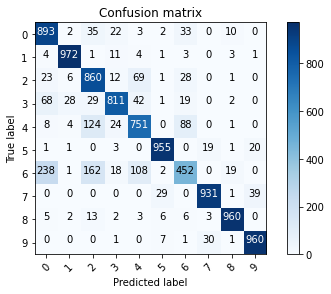

In [44]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Confusion matrix, without normalization
[[893   2  35  22   3   2  33   0  10   0]
 [  4 972   1  11   4   1   3   0   3   1]
 [ 23   6 860  12  69   1  28   0   1   0]
 [ 68  28  29 811  42   1  19   0   2   0]
 [  8   4 124  24 751   0  88   0   1   0]
 [  1   1   0   3   0 955   0  19   1  20]
 [238   1 162  18 108   2 452   0  19   0]
 [  0   0   0   0   0  29   0 931   1  39]
 [  5   2  13   2   3   6   6   3 960   0]
 [  0   0   0   1   0   7   1  30   1 960]]


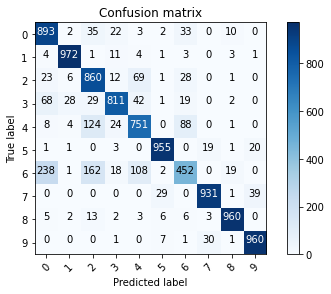

In [45]:
p_test2 = model2.predict(x_test).argmax(axis=1)
cm2 = confusion_matrix(y_test, p_test2)
plot_confusion_matrix(cm2, list(range(10)))

Confusion matrix, without normalization
[[893   2  35  22   3   2  33   0  10   0]
 [  4 972   1  11   4   1   3   0   3   1]
 [ 23   6 860  12  69   1  28   0   1   0]
 [ 68  28  29 811  42   1  19   0   2   0]
 [  8   4 124  24 751   0  88   0   1   0]
 [  1   1   0   3   0 955   0  19   1  20]
 [238   1 162  18 108   2 452   0  19   0]
 [  0   0   0   0   0  29   0 931   1  39]
 [  5   2  13   2   3   6   6   3 960   0]
 [  0   0   0   1   0   7   1  30   1 960]]


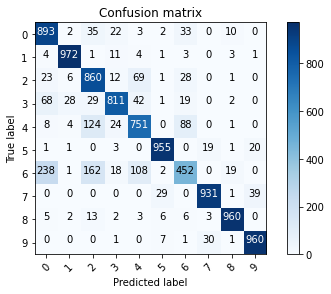

In [46]:
p_test3 = model3.predict(x_test).argmax(axis=1)
cm3 = confusion_matrix(y_test, p_test3)
plot_confusion_matrix(cm3, list(range(10)))

Confusion matrix, without normalization
[[835   1  22  26   4   1 104   0   7   0]
 [  2 961   1  24   3   0   8   0   1   0]
 [ 11   1 743   8 107   0 130   0   0   0]
 [ 12   1  23 888  31   0  40   0   4   1]
 [  1   1  35  24 817   0 121   0   1   0]
 [  0   0   0   2   0 969   0  17   0  12]
 [131   0  54  29  96   0 681   0   9   0]
 [  0   0   0   0   0  18   0 954   0  28]
 [  1   0   7   5   6   5   8   2 966   0]
 [  0   0   0   0   0   6   0  37   0 957]]


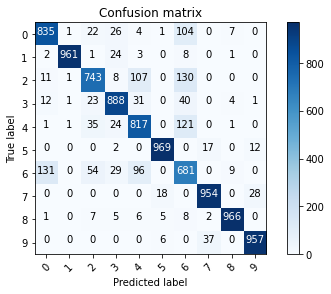

In [47]:
p_test4 = model4.predict(x_test).argmax(axis=1)
cm4 = confusion_matrix(y_test, p_test4)
plot_confusion_matrix(cm4, list(range(10)))

Confusion matrix, without normalization
[[835   1  22  26   4   1 104   0   7   0]
 [  2 961   1  24   3   0   8   0   1   0]
 [ 11   1 743   8 107   0 130   0   0   0]
 [ 12   1  23 888  31   0  40   0   4   1]
 [  1   1  35  24 817   0 121   0   1   0]
 [  0   0   0   2   0 969   0  17   0  12]
 [131   0  54  29  96   0 681   0   9   0]
 [  0   0   0   0   0  18   0 954   0  28]
 [  1   0   7   5   6   5   8   2 966   0]
 [  0   0   0   0   0   6   0  37   0 957]]


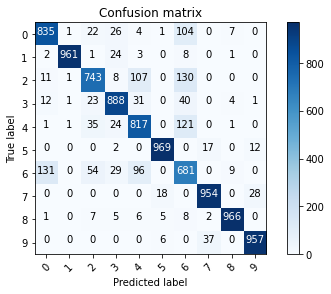

In [48]:
p_test5 = model5.predict(x_test).argmax(axis=1)
cm5 = confusion_matrix(y_test, p_test5)
plot_confusion_matrix(cm5, list(range(10)))

Confusion matrix, without normalization
[[835   1  22  26   4   1 104   0   7   0]
 [  2 961   1  24   3   0   8   0   1   0]
 [ 11   1 743   8 107   0 130   0   0   0]
 [ 12   1  23 888  31   0  40   0   4   1]
 [  1   1  35  24 817   0 121   0   1   0]
 [  0   0   0   2   0 969   0  17   0  12]
 [131   0  54  29  96   0 681   0   9   0]
 [  0   0   0   0   0  18   0 954   0  28]
 [  1   0   7   5   6   5   8   2 966   0]
 [  0   0   0   0   0   6   0  37   0 957]]


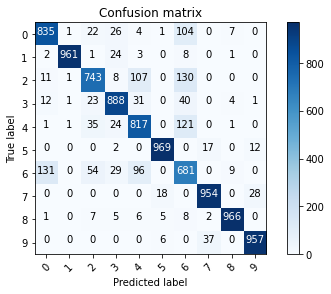

In [49]:
p_test6 = model6.predict(x_test).argmax(axis=1)
cm6 = confusion_matrix(y_test, p_test6)
plot_confusion_matrix(cm6, list(range(10)))

In [50]:
# 映射標籤
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

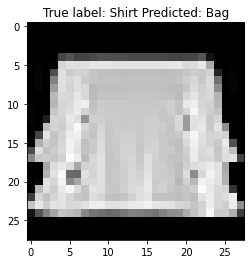

In [51]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

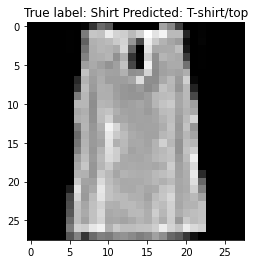

In [52]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test2 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

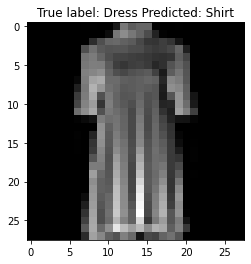

In [53]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test3 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

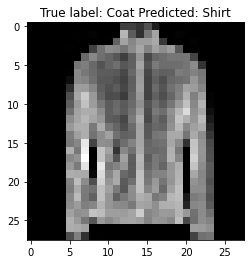

In [54]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test4 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

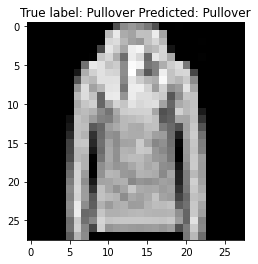

In [55]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test5 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

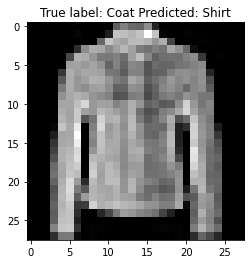

In [56]:
# 展示分類錯誤樣本
misclassified_idx = np.where(p_test6 != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));